In [1]:
## Yes, There are Redundancies

from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
# from sklearn.impute import IterativeImputer


from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler


from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression


from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression


from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier



from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc


from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

# from sklearn.experimental import enable_iterative_imputer  # Explicitly enable IterativeImputer



from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import StratifiedKFold

import pandas as pd
from sklearn.datasets import load_iris

import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import plot_tree


C:\Users\devan\AppData\Local\Temp\ipykernel_36276\1411021235.py:59: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
X,y=load_iris(return_X_y=True)
df=pd.DataFrame(X)
df['target']=y
df=df.sample(frac=1).reset_index(drop=True)

In [3]:
## Shuffling Is Better
X_train,X_test,y_train,y_test=train_test_split(df.drop('target',axis=1),df['target'],test_size=0.2)

In [4]:
###### Classification Pipeline
pipe= Pipeline([('impute',SimpleImputer()),
                ('scale',StandardScaler()),
                ('classifier',DecisionTreeClassifier())])
pipe.get_params()

## add other parameters as per your wish 

###### Regression Pipeline
r_pipe=Pipeline([('regressor',DecisionTreeRegressor())])
r_pipe.get_params()

{'memory': None,
 'steps': [('regressor', DecisionTreeRegressor())],
 'verbose': False,
 'regressor': DecisionTreeRegressor(),
 'regressor__ccp_alpha': 0.0,
 'regressor__criterion': 'squared_error',
 'regressor__max_depth': None,
 'regressor__max_features': None,
 'regressor__max_leaf_nodes': None,
 'regressor__min_impurity_decrease': 0.0,
 'regressor__min_samples_leaf': 1,
 'regressor__min_samples_split': 2,
 'regressor__min_weight_fraction_leaf': 0.0,
 'regressor__monotonic_cst': None,
 'regressor__random_state': None,
 'regressor__splitter': 'best'}

In [5]:
params=[{
            'classifier':[KNeighborsClassifier()],
            'classifier__n_neighbors':[1,2,3,4,5]
        },
        {
            'classifier':[DecisionTreeClassifier()],
            'classifier__max_depth':[1,2,3,4,5,6,7,8,9,10],
            'classifier__criterion':['gini','entropy'],
            
        },
        {
            'classifier':[SVC()],
            'classifier__kernel':['linear', 'poly', 'rbf', 'sigmoid'],
            'classifier__degree':[1,2,3,4],
            'classifier__C':[1,2,3,4,5]
            
        },
        {
            'classifier':[RandomForestClassifier()],
            'classifier__max_depth':[1,2,3,4,5,6,7,8,9,10],
            'classifier__criterion':['gini','entropy'],
            
        },
        {
            'classifier':[AdaBoostClassifier()],
            'classifier__learning_rate':[0.2,0.4,0.8,1.0,1.2,1.4],
            'classifier__n_estimators':list(np.arange(40,60,2)),
            
        },
        # {
        #     'classifier':[LogisticRegression()],
        #     'classifier__max_iter':[100,200,500,1000],
        #     'classifier__C':[1,2,3,4]
            
        # }
       ]


regparam=[{
                'regressor':[LinearRegression()]
           },
         {
                'regressor':[DecisionTreeRegressor()],
                 'regressor__max_depth': [1,2,3,4,5],
                 'regressor__max_features': [1,2,3,4,5],
           },]

In [6]:
grid = GridSearchCV(estimator=pipe,param_grid=params,cv=3,n_jobs=-1)
grid.fit(X_train,y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('impute', SimpleImputer()),
                                       ('scale', StandardScaler()),
                                       ('classifier',
                                        DecisionTreeClassifier())]),
             n_jobs=-1,
             param_grid=[{'classifier': [KNeighborsClassifier()],
                          'classifier__n_neighbors': [1, 2, 3, 4, 5]},
                         {'classifier': [DecisionTreeClassifier()],
                          'classifier__criterion': ['gini', 'entropy'],
                          'classifier__max_depth': [1...
                          'classifier__degree': [1, 2, 3, 4],
                          'classifier__kernel': ['linear', 'poly', 'rbf',
                                                 'sigmoid']},
                         {'classifier': [RandomForestClassifier()],
                          'classifier__criterion': ['gini', 'entropy'],
                          'classifier__max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                    10]},
                         {'classifier': [AdaBoostClassifier()],
                          'classifier__learning_rate': [0.2, 0.4, 0.8, 1.0, 1.2,
                                                        1.4],
                          'classifier__n_estimators': [40, 42, 44, 46, 48, 50,
                                                       52, 54, 56, 58]}])

In [7]:
print(grid.best_params_,"\nBest Score: ",grid.best_score_)
# df=pd.DataFrame(grid.cv_results_)

{'classifier': SVC(), 'classifier__C': 2, 'classifier__degree': 1, 'classifier__kernel': 'poly'} 
Best Score:  0.9833333333333334


In [8]:
y_pred=grid.predict(X_test)

Acc:  0.8666666666666667


Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       0.82      0.82      0.82        11
           2       0.85      0.85      0.85        13

    accuracy                           0.87        30
   macro avg       0.89      0.89      0.89        30
weighted avg       0.87      0.87      0.87        30


Confusion Matrix: 
 [[ 6  0  0]
 [ 0  9  2]
 [ 0  2 11]]


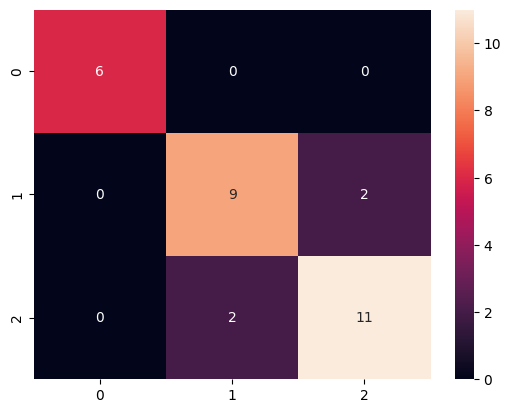

In [26]:
print("Acc: ",accuracy_score(y_test,y_pred))
print("\n\nClassification Report: \n",classification_report(y_test,y_pred))
cf=confusion_matrix(y_test,y_pred)
print("\nConfusion Matrix: \n",cf)

sns.heatmap(cf,annot=True,)
plt.show()

## K-Fold & LOO

In [9]:
cr_score=cross_val_score(SVC(), X_train,y_train, cv=KFold(n_splits=5,shuffle=True,random_state=42))

print("KFold Scores: ",cr_score,"\nMean Score: ",cr_score.mean())

KFold Scores:  [0.83333333 0.95833333 0.91666667 0.95833333 1.        ] 
Mean Score:  0.9333333333333333


In [10]:
cr_score=cross_val_score(SVC(),X_train,y_train, cv=LeaveOneOut())

print("LeaveOneOut Accuracy: ",len(cr_score[cr_score==1])/len(cr_score))

LeaveOneOut Accuracy:  0.95


In [11]:
cr_score=cross_val_score(SVC(), X_train,y_train, cv=StratifiedKFold(n_splits=5,shuffle=True,random_state=42))
print("StratifiedKFold Scores: ",cr_score,"\nMean Score: ",cr_score.mean())

StratifiedKFold Scores:  [0.91666667 1.         0.95833333 0.95833333 0.91666667] 
Mean Score:  0.95


In [12]:
DTC=DecisionTreeClassifier()
DTC.fit(X_train,y_train)
y_pred=DTC.predict(X_test)

accuracy_score(y_test,y_pred)

0.9333333333333333

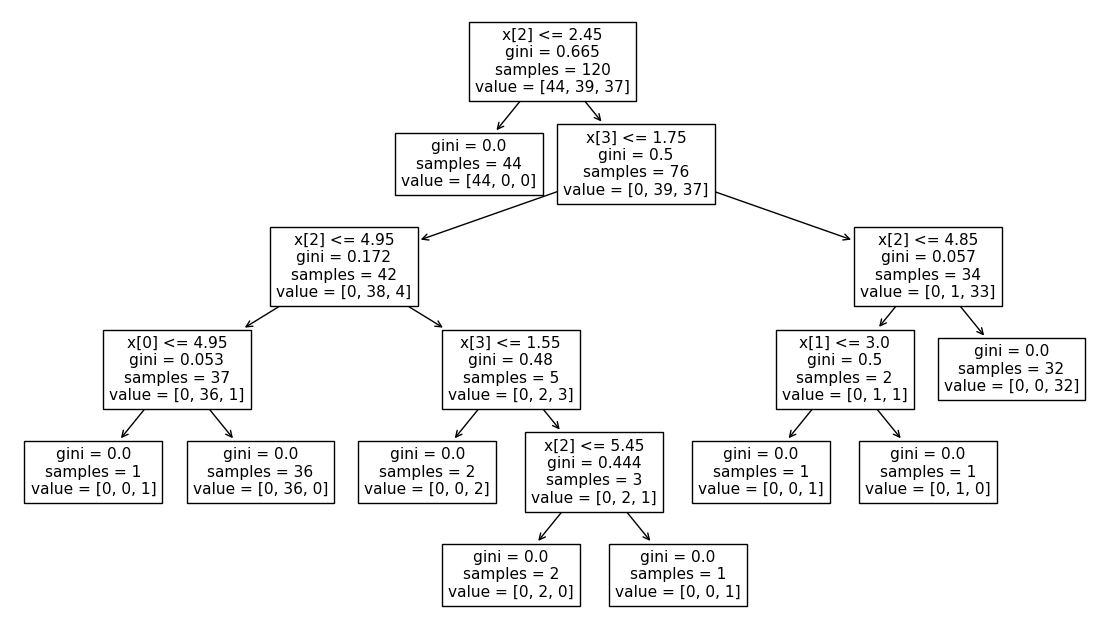

In [339]:
plt.figure(figsize=(14,8))
plot_tree(DTC)
plt.show()

In [ ]:
#################################################    Devlopment Postponed ################################################

# class Drop_Dup():
#     def __init__(self):
#         pass

#     def fit(self,X,y=None):
#         return len(X)-len(np.unique(X))

#     def transform(self,X,y=None):
#         X_uniq,idx=np.unique(X,axis=0,return_index=True)
#         return X_uniq,[y[i] for i in idx]

# class Drop_Out():
    
#     def __init__(self,th=3):
#         self.th=th

#     def fit(self,X,y=None):
#         return X,y

#     def transform(self,X,y=None):
#         z_pass=np.abs(stats.zscore(X))<self.th
#         return [X[i] for i in range(len(X)) if z_pass[i]],None if y==None else [y[i] for i in range(len(y)) if z_pass[i]]